In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants as cs
from astropy import units as un
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [4]:
### import data for simulation 1 w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data for simulation 2 w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### initialize phasespace objects ###
wobh_1=GCphasespace(r_3d_wo_1,bin_num=20)
bh_1=GCphasespace(r_3d_1,bin_num=20)
wobh_2=GCphasespace(r_3d_wo_2,bin_num=20)
bh_2=GCphasespace(r_3d_2,bin_num=20)


In [7]:
### load half light and half mass radii for both simulations ###
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_1,hlr_wo_2=np.loadtxt('half_mass_and_half_light_radius')

In [8]:
### take IMBH out of data 1###
mges_1=np.sum(m1_1+m2_1)
r3d0_1=r_3d_1[0]
m10_1=m1_1[0]
m20_1=m2_1[0]
x0_1=x_1[0]
y0_1=y_1[0]
z0_1=z_1[0]

r_3d_crop_1=r_3d_1[1:]
m1_crop_1=m1_1[1:]
m2_crop_1=m2_1[1:]
x_crop_1=x_1[1:]
y_crop_1=y_1[1:]
z_crop_1=z_1[1:]

In [9]:
### take IMBH out of data 2###
mges_2=np.sum(m1_2+m2_2)
r3d0_2=r_3d_2[0]
m10_2=m1_2[0]
m20_2=m2_2[0]
x0_2=x_2[0]
y0_2=y_2[0]
z0_2=z_2[0]

r_3d_crop_2=r_3d_2[1:]
m1_crop_2=m1_2[1:]
m2_crop_2=m2_2[1:]
x_crop_2=x_2[1:]
y_crop_2=y_2[1:]
z_crop_2=z_2[1:]

In [10]:
### calculate mean density and its mean radius and save them ###
r_dens_bh_1,dens_bh_1=bh_1.density(r_3d_crop_1,m1_crop_1,m2_crop_1,r_3d_crop_1[300],np.max(r_3d_crop_1),step=20) 
r_dens_bh_2,dens_bh_2=bh_2.density(r_3d_crop_2,m1_crop_2,m2_crop_2,r_3d_crop_2[300],np.max(r_3d_crop_2),step=20) 
r_dens_wobh_1,dens_wobh_1=wobh_1.density(r_3d_wo_1,m1_wo_1,m2_wo_1,r_3d_wo_1[300],np.max(r_3d_wo_1),step=17) 
r_dens_wobh_2,dens_wobh_2=wobh_2.density(r_3d_wo_2,m1_wo_2,m2_wo_2,r_3d_wo_2[300],np.max(r_3d_wo_2),step=17) 

np.savetxt('densityfile_IMBH1.txt',(r_dens_bh_1,dens_bh_1))
np.savetxt('densityfile_IMBH2.txt',(r_dens_bh_2,dens_bh_2))
np.savetxt('densityfile_noIMBH1.txt',(r_dens_wobh_1,dens_wobh_1))
np.savetxt('densityfile_noIMBH2.txt',(r_dens_wobh_2,dens_wobh_2))


0 219
1 378
2 742
3 1567
4 3092
5 6360
6 13488
7 28127
8 53384
9 90536
10 134289
11 169023
12 175311
13 149928
14 104902
15 63180
16 29994
17 1783
18 87
19 43
0 237
1 433
2 866
3 1743
4 3678
5 8214
6 17485
7 35947
8 66280
9 109747
10 156403
11 186733
12 181133
13 140921
14 90596
15 51369
16 25067
17 2064
18 119
19 40
0 411
1 1001
2 2325
3 5132
4 10470
5 19726
6 33398
7 49376
8 63639
9 70633
10 67095
11 54965
12 39016
13 25200
14 15289
15 8049
16 2601
0 569
1 1534
2 3826
3 9406
4 21668
5 45538
6 86220
7 143607
8 211112
9 268181
10 290637
11 269987
12 210221
13 143337
14 85939
15 45273
16 14200


In [11]:
### calculate distance over effective radius ###
r_plot_bh_1=r_dens_bh_1/hmr_bh_1
r_plot_bh_2=r_dens_bh_2/hmr_bh_2
r_plot_wobh_1= r_dens_wobh_1/hmr_wo_bh_1
r_plot_wobh_2= r_dens_wobh_2/hmr_wo_bh_2

In [12]:
### initialize orbit objects ###
orb_bh_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m10_1+m20_1)
orb_bh_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m10_2+m20_2)
orb_wobh_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
orb_wobh_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [13]:
### interpolate density ###
intpol_dens_bh_1=orb_bh_1.density(r_3d_crop_1)
intpol_dens_bh_2=orb_bh_2.density(r_3d_crop_2)
intpol_dens_wobh_1=orb_wobh_1.density(r_3d_wo_1)
intpol_dens_wobh_2=orb_wobh_2.density(r_3d_wo_2)

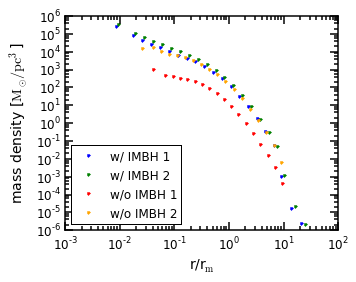

In [14]:
### plot both densities over r over effective radius ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_plot_bh_1,dens_bh_1,'b.',label='w/ IMBH 1')
ax1.loglog(r_plot_bh_2,dens_bh_2,'g.',label='w/ IMBH 2')
ax1.loglog(r_plot_wobh_1,dens_wobh_1,'r.', label='w/o IMBH 1')
ax1.loglog(r_plot_wobh_2,dens_wobh_2,'.',color='orange', label='w/o IMBH 2')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^3$]',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/density_profiles.pdf',format='pdf',bbox_inches='tight')

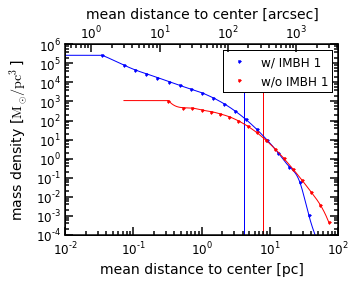

In [15]:
### plot both densities and interpolations over r ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.loglog(r_dens_bh_1,dens_bh_1,'b.',label='w/ IMBH 1')
ax1.loglog(r_3d_1[1:],intpol_dens_bh_1,'b')
#ax1.loglog(r_dens_bh_2,dens_bh_2,'g.',label='w/ IMBH 2')
#ax1.loglog(r_3d_2[1:],intpol_dens_bh_2,'g')
ax1.loglog(r_dens_wobh_1,dens_wobh_1,'r.',label='w/o IMBH 1')
ax1.loglog(r_3d_wo_1,intpol_dens_wobh_1,'r')
#ax1.loglog(r_dens_wobh_2,dens_wobh_2,'.',color='orange',label='w/o IMBH 2')
#ax1.loglog(r_3d_wo_2,intpol_dens_wobh_2,color='orange')
ax1.legend(loc=0,numpoints=1)

ax1.vlines(hmr_bh_1,1e-4,1e5,colors='b')
#ax1.vlines(hmr_bh_2,1e-4,1e5,colors='g')
ax1.vlines(hmr_wo_bh_1,1e-4,1e5,colors='r')
#ax1.vlines(hmr_wo_bh_2,1e-4,1e5,color='orange')

ax1.set_xlim(0.01,100)
ax1.set_ylim(1e-4,1e6)
ax1.set_xlabel('mean distance to center [pc]',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^3$]',fontsize=14)

ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance to center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/density_profiles_interpolated.pdf',format='pdf',bbox_inches='tight')

In [22]:
### compare to wrong density ###
r0_wrong=0.01
step=20
end=100
stepsize=((np.log10(end)-np.log10(r0_wrong))/step)
R_wrong=np.zeros(step)
r=np.logspace(np.log10(r0_wrong),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]
binwidth=r_a-r_i
#r_error=binwidth/2
M_wrong = np.zeros(step)
rho_wrong=np.zeros(step)

for n in range(step):
    inbin_wrong=(r_i[n]<r_3d_crop_1) * (r_3d_crop_1<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M_wrong[n]=np.sum(m1_crop_1[inbin_wrong])+np.sum(m2_crop_1[inbin_wrong]) #mass array with both masses of binary system
    rho_wrong[n]=M_wrong[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    R_wrong[n]=np.mean(r_3d_crop_1[inbin_wrong]) #calculates mean distance of bin
    
#extrabin am anfang
M_extra_wrong=np.sum(m1_crop_1[r_3d_crop_1<r0_wrong])+np.sum(m2_crop_1[r_3d_crop_1<r0_wrong])
rho_extra_wrong=M_extra_wrong/(r0_wrong**2*np.pi)
R_extra_wrong=np.mean(r_3d_crop_1[r_3d_crop_1<r0_wrong])
#einfuegen in bereits angefertigte arrays an erster Stelle
M_final_wrong=np.insert(M_wrong,0,M_extra_wrong)
rho_final_wrong=np.insert(rho_wrong,0,rho_extra_wrong)
R_final_wrong=np.insert(R_wrong,0,R_extra_wrong)

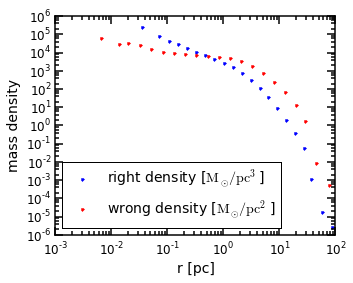

In [29]:

### plot both densities over r over effective radius ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_dens_bh_1,dens_bh_1,'b.',label='right density [$\mathrm{M}_\odot/\mathrm{pc}^3$]')
ax1.loglog(R_final_wrong,rho_final_wrong,'r.', label='wrong density [$\mathrm{M}_\odot/\mathrm{pc}^2$]')
ax1.legend(loc=0,numpoints=1,prop={'size':14})

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('r [pc]',fontsize=14)
ax1.set_ylabel('mass density',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/wrong_density_profiles.pdf',format='pdf',bbox_inches='tight')

In [30]:
print(R_final_wrong,rho_final_wrong)

[  6.57905444e-03   1.34474353e-02   2.02322040e-02   3.28544144e-02
   5.19759270e-02   8.19579341e-02   1.31183268e-01   2.08090259e-01
   3.29428948e-01   5.23044361e-01   8.29241236e-01   1.30764964e+00
   2.05750687e+00   3.23399281e+00   5.07042572e+00   7.94378943e+00
   1.24518874e+01   1.96022105e+01   2.90495417e+01   4.56918546e+01
   7.75044255e+01] [  6.03416009e+04   2.81634794e+04   3.16797316e+04   2.45309781e+04
   1.55423711e+04   1.09635637e+04   9.24167148e+03   8.19967124e+03
   7.36508869e+03   6.57170377e+03   6.06760229e+03   4.99540064e+03
   3.38435560e+03   1.82730438e+03   7.75183866e+02   2.55181574e+02
   6.52400385e+01   1.36811960e+01   1.68664623e+00   9.01972148e-03
   5.63551939e-04]
